In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/instagram-detecting-fake-accounts/instagram.csv
/kaggle/input/instagram-detecting-fake-accounts/instagram_description.csv


In [2]:
insta_data=pd.read_csv(r"/kaggle/input/instagram-detecting-fake-accounts/instagram.csv")

In [3]:
insta_data


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [4]:
data=pd.read_csv(r"/kaggle/input/instagram-detecting-fake-accounts/instagram_description.csv")

In [5]:
data

,Variable,Description
0,profile pic,user has profile picture or not
1,nums/length username,ratio of number of numerical chars in username...
2,fullname words,full name in word tokens
3,nums/length fullname,ratio of number of numerical characters in ful...
4,name==username,are username and full name literally the same
5,description length,bio length in characters
6,external URL,has external URL or not
7,private,private or not
8,#posts,number of posts
9,#followers,number of followers


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [7]:
x=insta_data.drop(columns=['fake'])
y=insta_data['fake']

In [8]:
x

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [9]:
y

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [10]:
y.shape

(576,)

In [11]:
import tensorflow as tf

2024-06-27 06:27:03.009376: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-27 06:27:03.009608: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-27 06:27:03.161088: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [12]:
y = tf.keras.utils.to_categorical(y, num_classes=2)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=0)

In [14]:
sc=StandardScaler()

In [15]:
x_train_new=sc.fit_transform(x_train)
x_test_new=sc.transform(x_test)

In [16]:
x_train_new

array([[ 0.63719309, -0.7799692 , -0.496394  , ...,  0.04327445,
        -0.10527098,  0.40144519],
       [-1.56938299, -0.7799692 ,  0.52366839, ..., -0.24308558,
        -0.10685737, -0.50215094],
       [ 0.63719309, -0.7799692 ,  0.52366839, ..., -0.20914661,
        -0.10674915, -0.35034679],
       ...,
       [ 0.63719309,  0.25763574, -0.496394  , ..., -0.23672203,
        -0.1068213 ,  0.18354943],
       [ 0.63719309, -0.7799692 ,  0.52366839, ..., -0.2261161 ,
        -0.10618187,  0.72983784],
       [ 0.63719309,  1.57822385, -0.496394  , ..., -0.21763136,
        -0.10678973, -0.4216018 ]])

In [17]:

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

#Building the main model***

model = Sequential() 
model.add(Dense(50,input_dim = 11, activation = "relu")) #Initial Layer
model.add(Dropout(0.3))
model.add(Dense(150, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(25, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(2, activation = "softmax")) #output layer

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │         7,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         3,775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,077 (47.18 KB)

 Trainable params: 12,077 (47.18 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
y_train.shape     



(374, 2)

In [19]:
epochs_hist = model.fit(x_train_new, y_train, epochs = 30, verbose = 1, validation_split = 0.1)

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5704 - loss: 0.6843 - val_accuracy: 0.8947 - val_loss: 0.5379
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7565 - loss: 0.5691 - val_accuracy: 0.9211 - val_loss: 0.4309
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7992 - loss: 0.4659 - val_accuracy: 0.9211 - val_loss: 0.3373
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8684 - loss: 0.4434 - val_accuracy: 0.9211 - val_loss: 0.2852
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8602 - loss: 0.3449 - val_accuracy: 0.9211 - val_loss: 0.2521
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8815 - loss: 0.3749 - val_accuracy: 0.9474 - val_loss: 0.2399
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8742 - loss: 0.3113 - val_accuracy: 0.9474 - val_loss: 0.2223
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9138 - loss: 0.2691 - val_accuracy: 0.9474 - val_loss

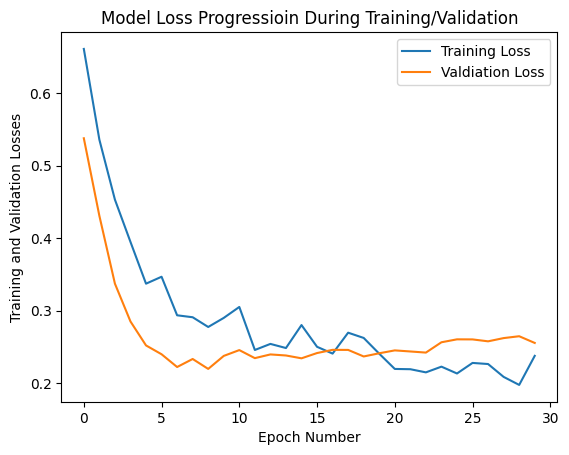

In [20]:
import matplotlib.pyplot as plt
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progressioin During Training/Validation')
plt.xlabel('Epoch Number')
plt.ylabel('Training and Validation Losses')
plt.legend(['Training Loss','Valdiation Loss'])

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before oper

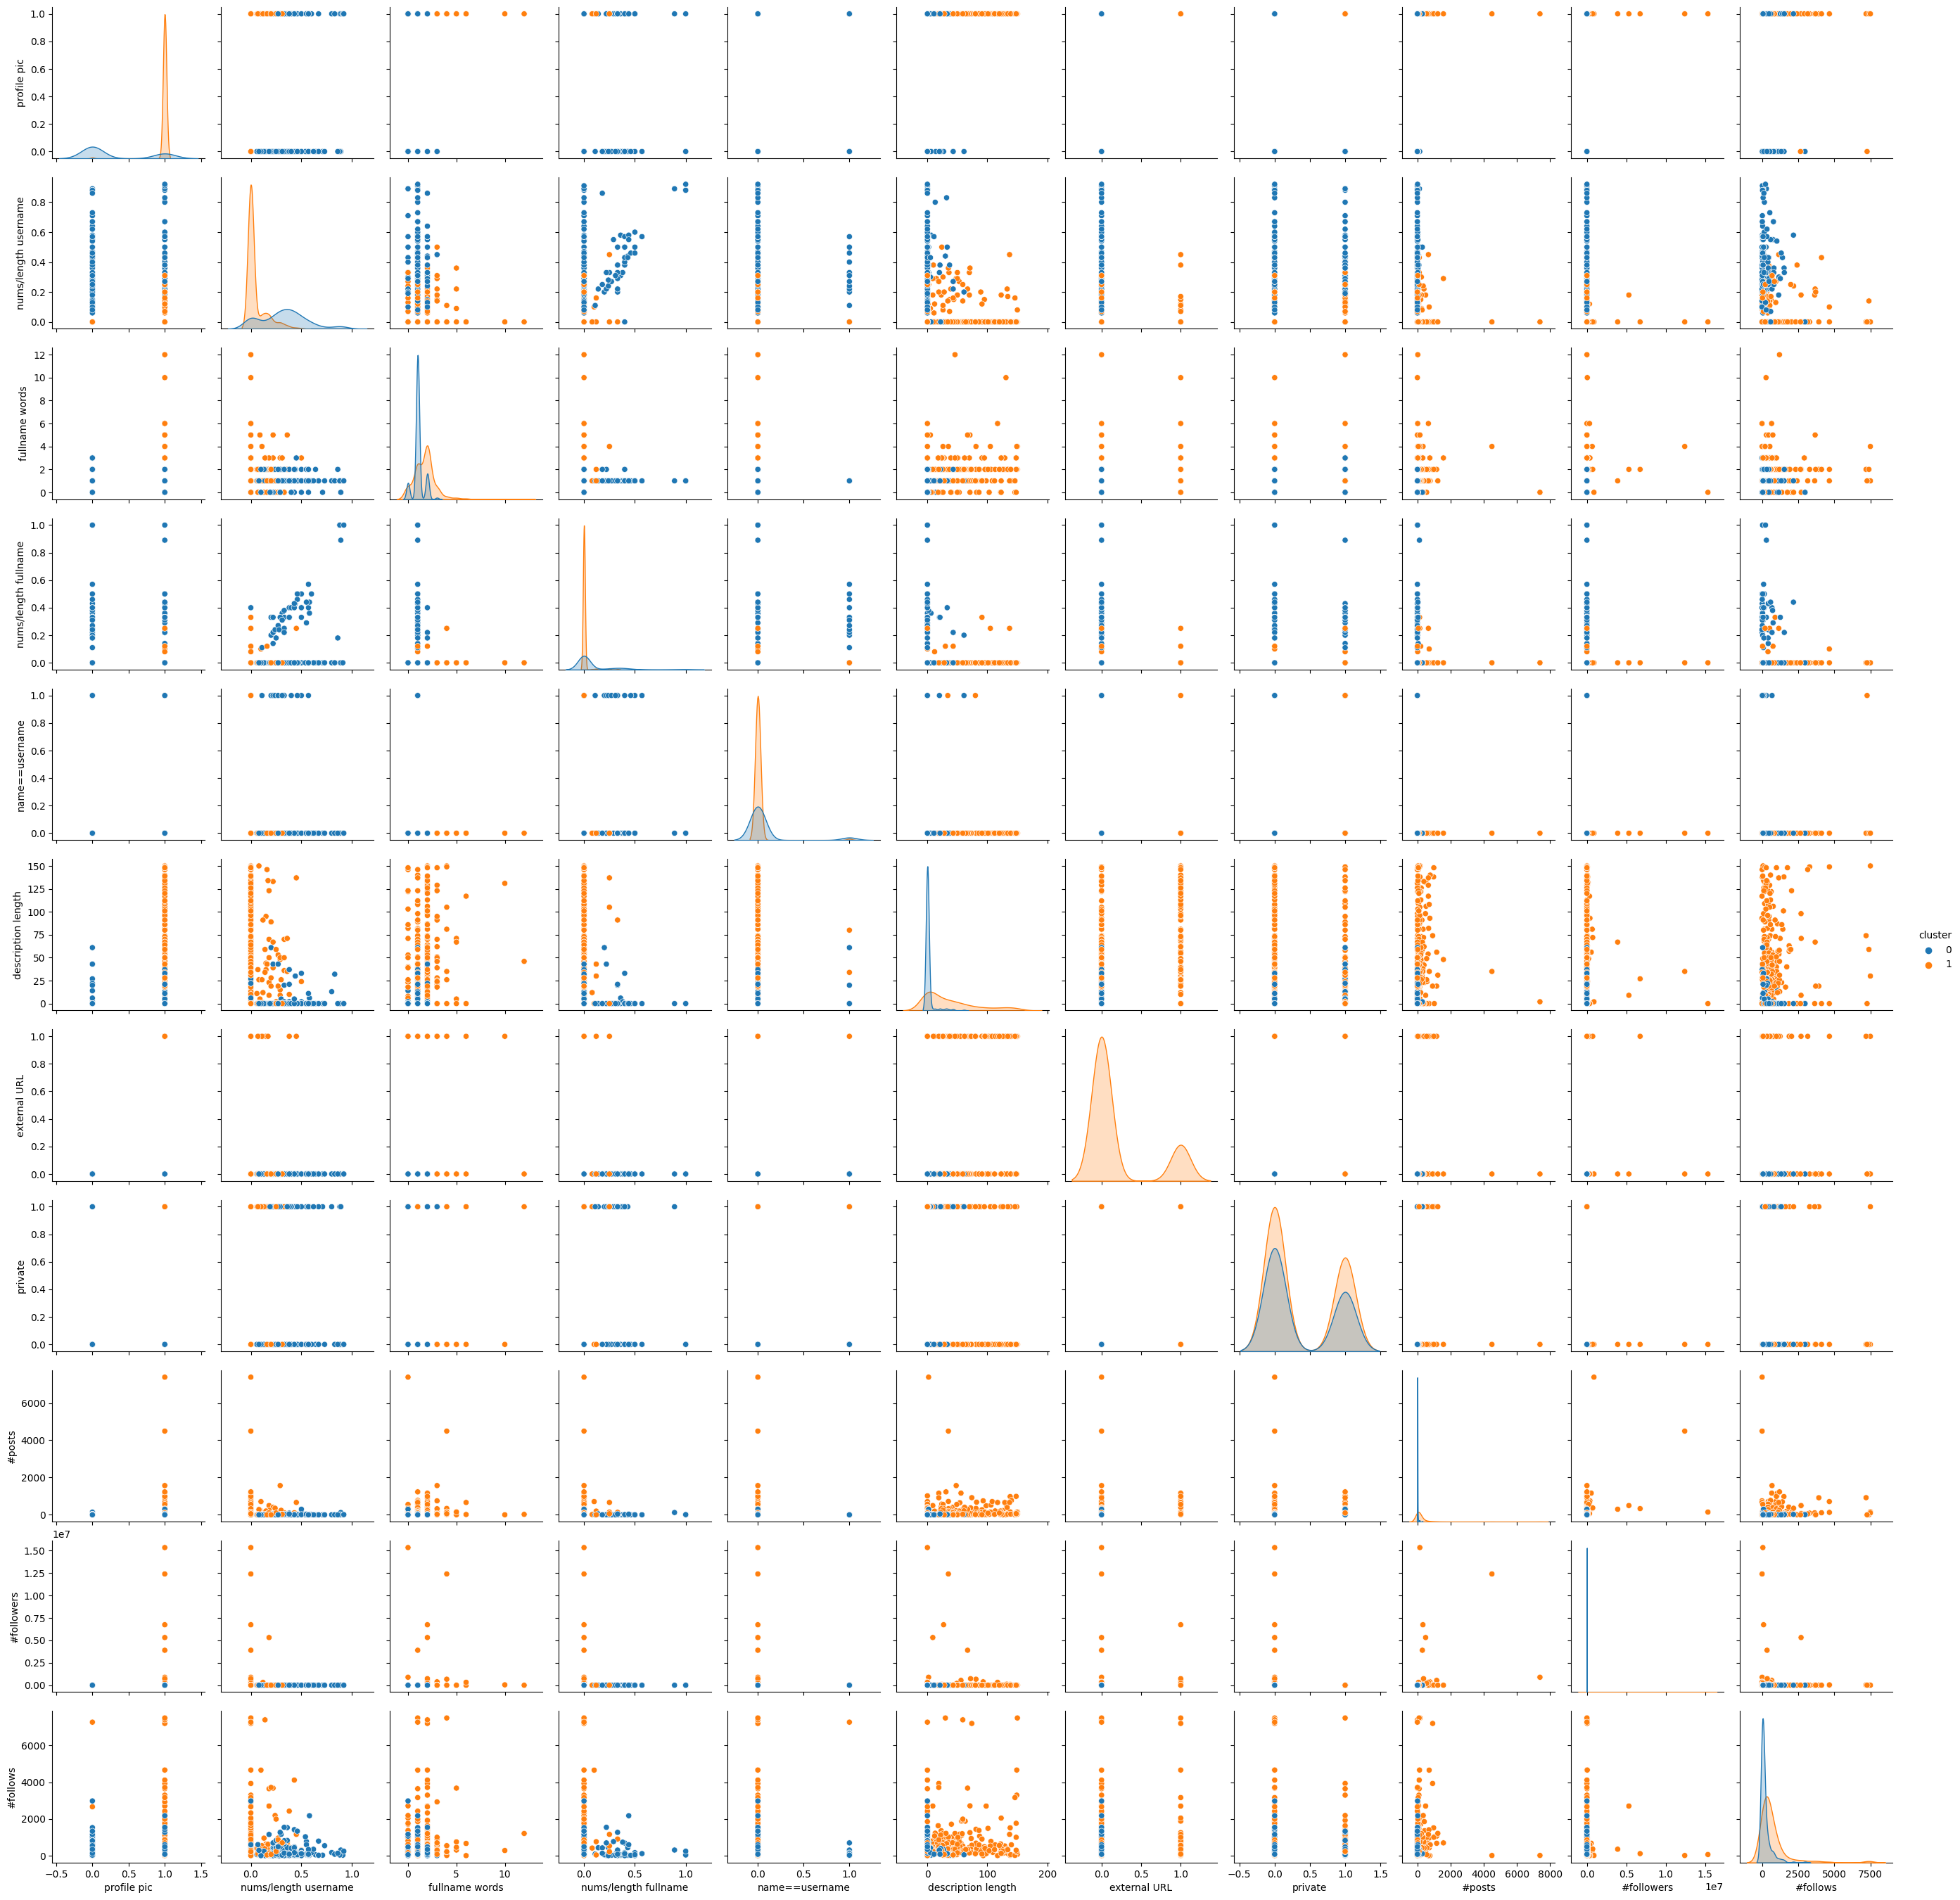

In [21]:
# using machine learning
from sklearn.cluster import KMeans

import seaborn as sns

# Standardize the data

X_scaled = sc.fit_transform(x)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
insta_data['cluster'] = clusters

# Visualize the clusters
sns.pairplot(insta_data, hue='cluster', vars=x)
plt.show()

# Analyze clusters to determine which corresponds to fake accounts
# You might need to manually i